### Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Diabetes Dataset

In [51]:
df = pd.read_csv('diabetes.csv')

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.drop(['DiabetesPedigreeFunction'],axis=1,inplace=True)

In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


### Check for Outliers and Autocorrelation between Independent Variables

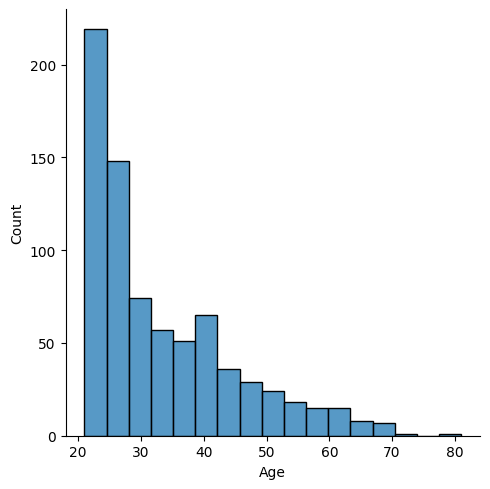

In [55]:
sns.displot(df['Age'])

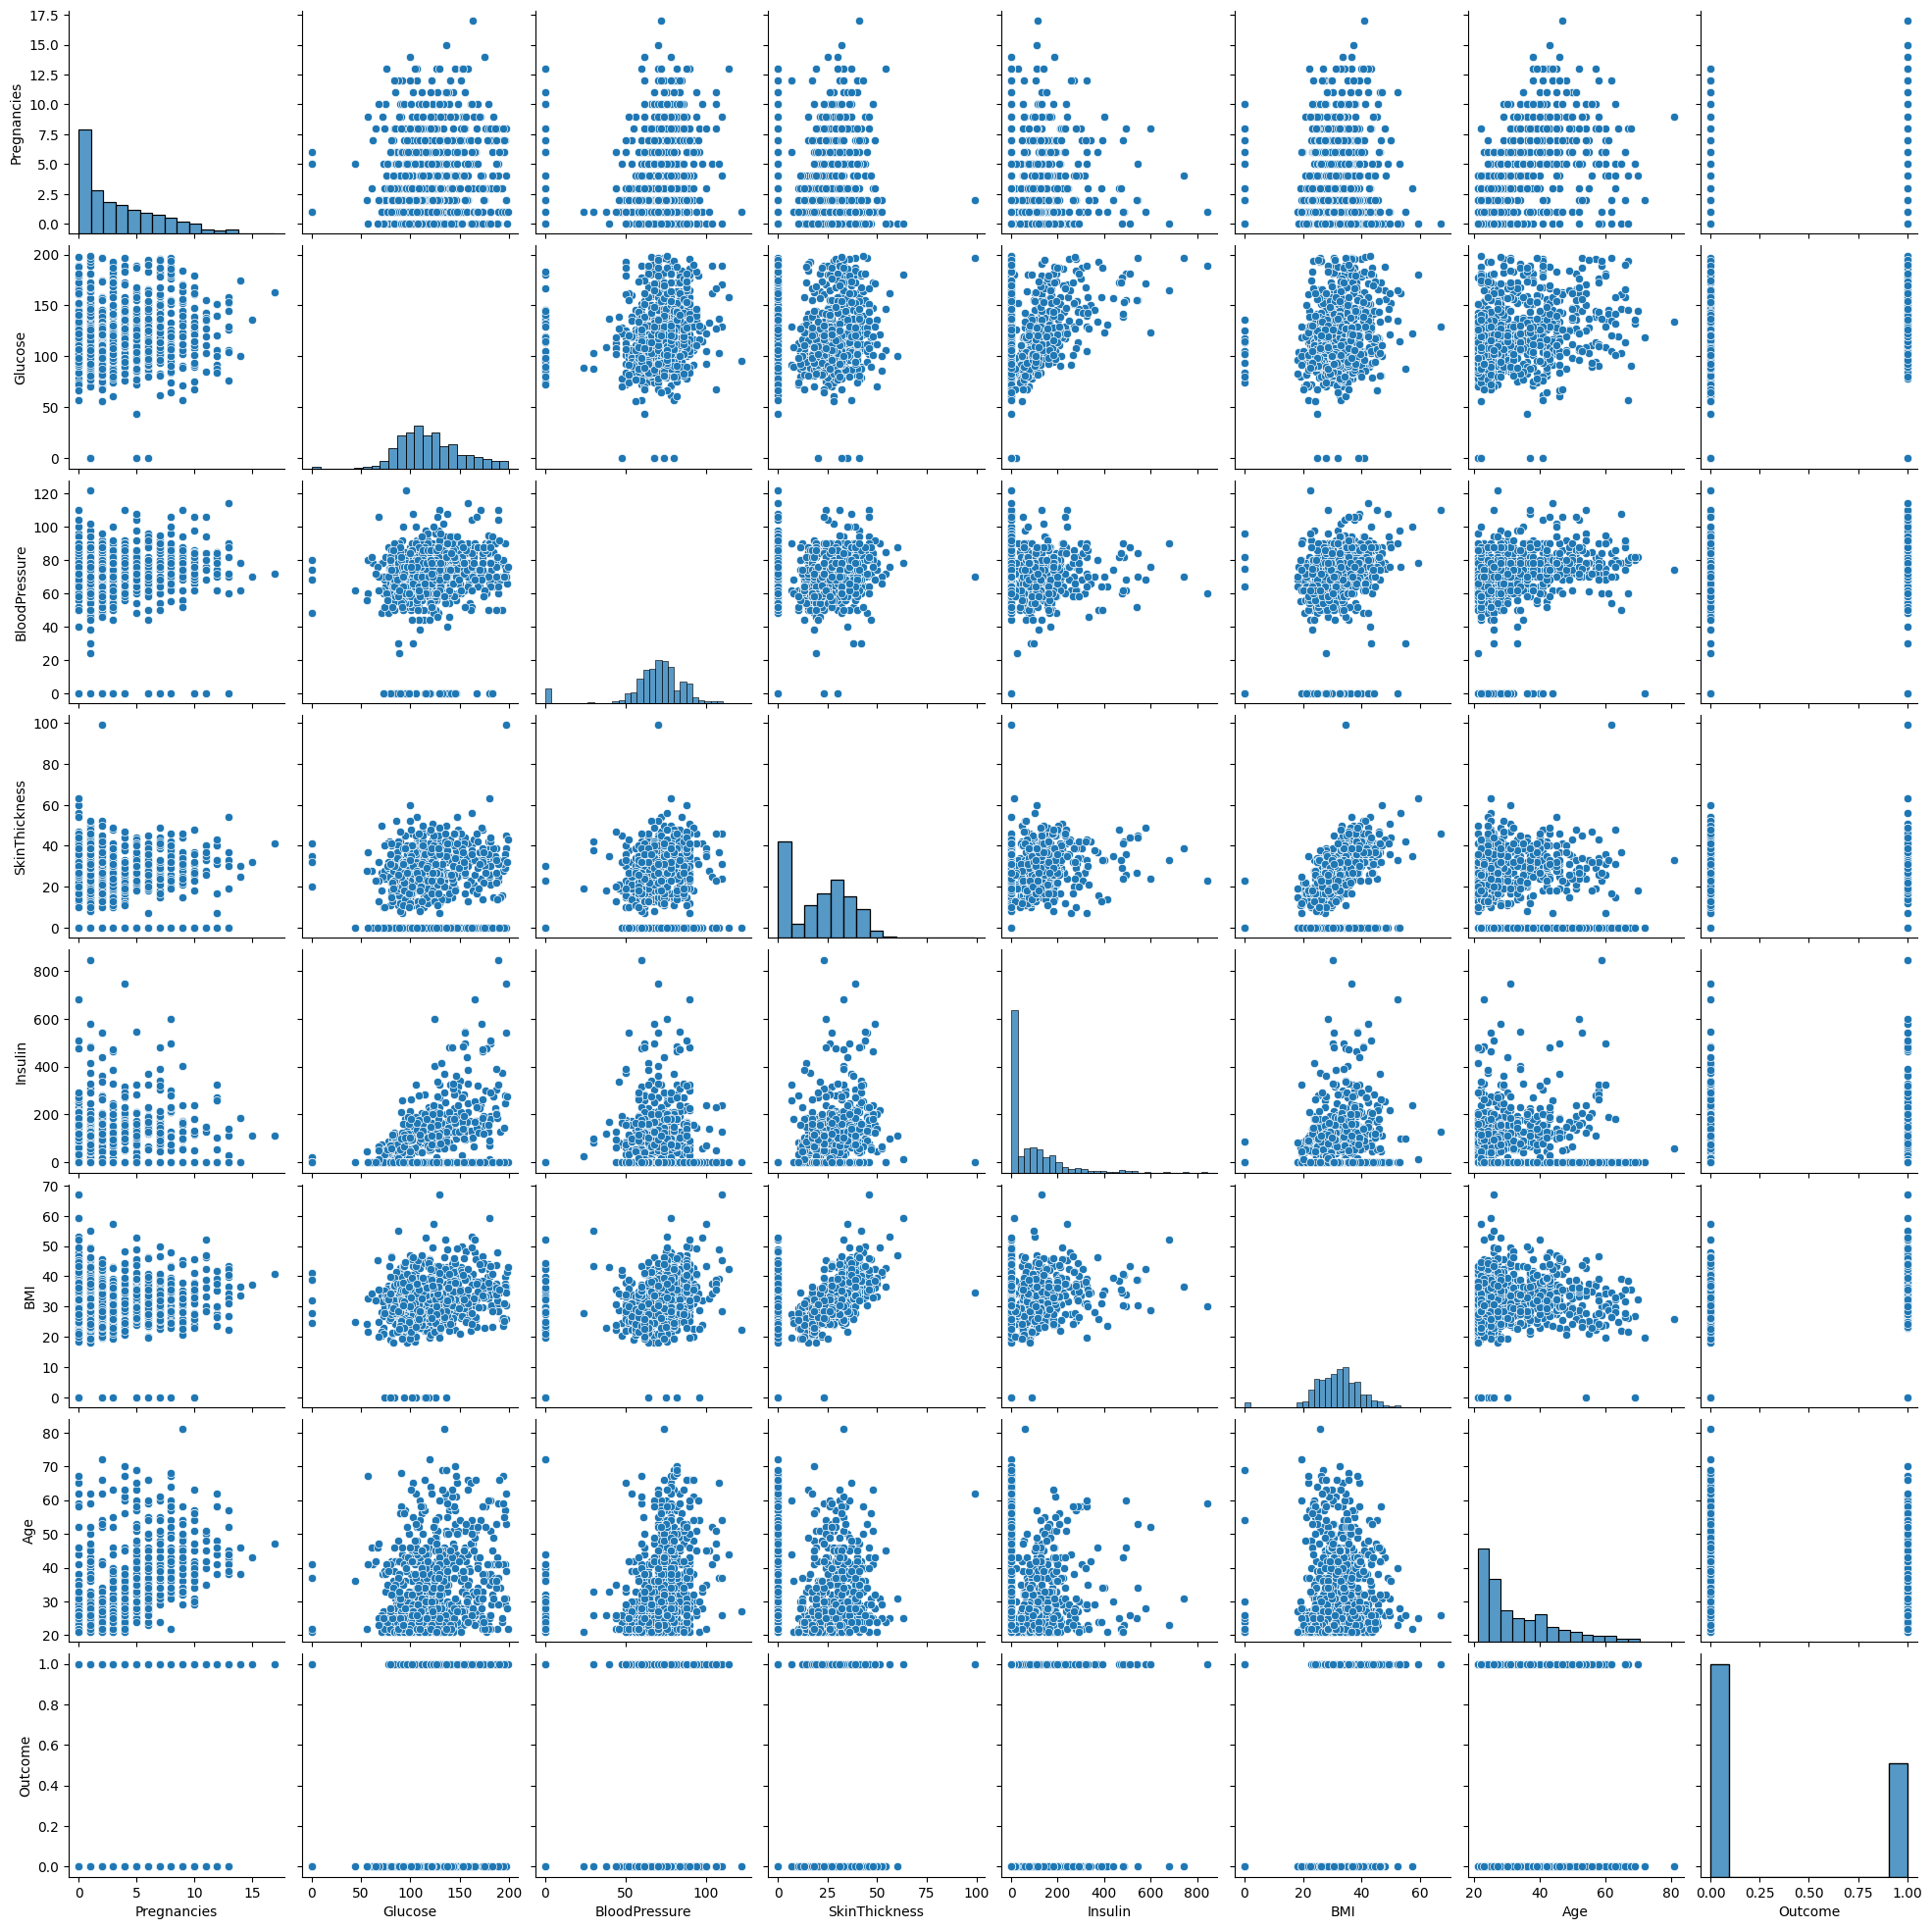

In [56]:
sns.pairplot(df)

<Axes: >

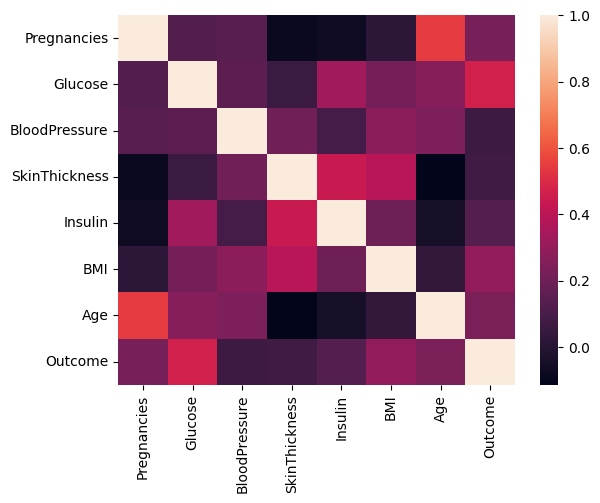

In [57]:
sns.heatmap(df.corr())

### Preprocessing the data (Min-Max Scaling)

In [58]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [60]:
# X['BMI'] = MinMaxScaler().fit_transform(X[['BMI']])
# X['Age'] = MinMaxScaler().fit_transform(X[['Age']])
# X['BloodPressure'] = MinMaxScaler().fit_transform(X[['BloodPressure']])
# X['SkinThickness'] = MinMaxScaler().fit_transform(X[['SkinThickness']])
# X['Insulin'] = MinMaxScaler().fit_transform(X[['Insulin']])
# X['Glucose'] = MinMaxScaler().fit_transform(X[['Glucose']])

In [61]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33


### Split Data into Train and Test sets

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, y_train.shape

((614, 7), (614,))

In [65]:
X_test.shape,y_test.shape

((154, 7), (154,))

### Trying Different models

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

In [104]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [105]:
lr.score(X_test,y_test)

0.7272727272727273

#### Random Forest Classifier

In [106]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
rfr.score(X_test,y_test)

0.7337662337662337

#### Support Vector Classifier

In [108]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [109]:
svc.score(X_test,y_test)

0.7662337662337663

#### Decision Tree Classifier

In [110]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
dtc.score(X_test,y_test)

0.6818181818181818

#### KNeighbors Classifier

In [112]:
knc = KNeighborsClassifier(n_neighbors=20)

In [113]:
knc.fit(X_train,y_train)
knc.score(X_test,y_test)

0.7272727272727273

### K-Fold Cross-Validation and Hyperparameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

#### 1. Kneighbors Classifier model

In [115]:
knc_gsv = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[10,20,30,40]},cv=10)

In [116]:
knc_gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 20, 30, 40]})

In [117]:
pd.DataFrame(knc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002200,0.000981,0.004399,0.001114,10,{'n_neighbors': 10},0.677419,0.709677,0.790323,0.725806,0.721311,0.721311,0.672131,0.786885,0.819672,0.754098,0.737864,0.046447,1
1,0.001798,0.000406,0.004002,0.000454,20,{'n_neighbors': 20},0.677419,0.693548,0.774194,0.677419,0.754098,0.737705,0.688525,0.721311,0.754098,0.688525,0.716684,0.034315,4
2,0.001698,0.000466,0.003902,0.000300,30,{'n_neighbors': 30},0.693548,0.693548,0.774194,0.725806,0.737705,0.754098,0.655738,0.754098,0.803279,0.704918,0.729693,0.041667,2
3,0.001692,0.000456,0.004008,0.000019,40,{'n_neighbors': 40},0.677419,0.693548,0.790323,0.741935,0.721311,0.737705,0.688525,0.737705,0.770492,0.721311,0.728027,0.033860,3


#### 2. Random Forest Classifier Model

In [118]:
rfc_gsv = GridSearchCV(RandomForestClassifier(),{'n_estimators':[20,50,100,150],'criterion':['gini','entropy']},cv=10)

In [119]:
rfc_gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 50, 100, 150]})

In [120]:
pd.DataFrame(rfc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038960,0.004318,0.002697,0.000456,gini,20,"{'criterion': 'gini', 'n_estimators': 20}",0.758065,0.709677,0.870968,0.725806,0.737705,0.836066,0.754098,0.704918,0.770492,0.770492,0.763829,0.050443,6
1,0.079400,0.008140,0.003701,0.000456,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.758065,0.774194,0.870968,0.774194,0.737705,0.836066,0.721311,0.704918,0.786885,0.803279,0.776758,0.048293,1
2,0.154718,0.003793,0.005996,0.000776,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.774194,0.741935,0.870968,0.774194,0.672131,0.819672,0.754098,0.704918,0.786885,0.754098,0.765309,0.052791,5
3,0.223768,0.003506,0.007651,0.000447,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.758065,0.758065,0.887097,0.725806,0.737705,0.770492,0.770492,0.672131,0.786885,0.786885,0.765362,0.051891,4
4,0.033752,0.001029,0.002103,0.000299,entropy,20,"{'criterion': 'entropy', 'n_estimators': 20}",0.725806,0.774194,0.854839,0.790323,0.655738,0.786885,0.737705,0.688525,0.819672,0.754098,0.758778,0.056625,7
5,0.081349,0.002632,0.003598,0.000494,entropy,50,"{'criterion': 'entropy', 'n_estimators': 50}",0.741935,0.758065,0.854839,0.725806,0.672131,0.737705,0.770492,0.639344,0.770492,0.737705,0.740851,0.055064,8
6,0.163649,0.009081,0.005501,0.000502,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.774194,0.725806,0.854839,0.741935,0.754098,0.819672,0.786885,0.688525,0.803279,0.803279,0.775251,0.046410,2
7,0.244772,0.006145,0.007699,0.001179,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.741935,0.774194,0.870968,0.725806,0.704918,0.786885,0.786885,0.721311,0.786885,0.770492,0.767028,0.045085,3


#### 3. Decision Tree Classifier Model

In [121]:
dtc_gsv = GridSearchCV(DecisionTreeClassifier(),{'max_depth':[2,4,6,8],'criterion':['gini','entropy']},cv=10)

In [122]:
dtc_gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [123]:
pd.DataFrame(dtc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001904,5.392353e-04,0.001200,0.000408,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.677419,0.709677,0.758065,0.741935,0.737705,0.819672,0.672131,0.721311,0.754098,0.803279,0.739529,0.045470,6
1,0.002199,3.999510e-04,0.001097,0.000287,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.725806,0.741935,0.806452,0.774194,0.704918,0.836066,0.655738,0.688525,0.737705,0.737705,0.740904,0.050992,5
2,0.002999,5.245209e-07,0.001005,0.000012,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.725806,0.725806,0.806452,0.758065,0.737705,0.803279,0.622951,0.803279,0.754098,0.770492,0.750793,0.051791,2
3,0.003199,4.013330e-04,0.000901,0.000300,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.709677,0.725806,0.806452,0.774194,0.704918,0.803279,0.672131,0.721311,0.737705,0.754098,0.740957,0.041341,4
4,0.001799,3.999236e-04,0.000901,0.000539,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.677419,0.709677,0.758065,0.645161,0.688525,0.737705,0.672131,0.688525,0.754098,0.737705,0.706901,0.036491,8
5,0.002199,3.993681e-04,0.000900,0.000300,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.758065,0.709677,0.822581,0.774194,0.737705,0.852459,0.655738,0.688525,0.770492,0.721311,0.749075,0.056650,3
6,0.003000,1.446515e-06,0.001003,0.000009,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.758065,0.709677,0.806452,0.806452,0.754098,0.852459,0.672131,0.721311,0.786885,0.704918,0.757245,0.053229,1
7,0.003399,4.900261e-04,0.001000,0.000002,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.758065,0.725806,0.774194,0.758065,0.688525,0.836066,0.655738,0.639344,0.770492,0.704918,0.731121,0.057014,7


#### 4. Support Vector Classifier

In [124]:
svc_gsv = GridSearchCV(SVC(),{'kernel':['rbf','sigmoid'],'gamma':['scale','auto']},cv=10)

In [125]:
svc_gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']})

In [126]:
pd.DataFrame(svc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005900,0.000539,0.002404,0.000487,scale,rbf,"{'gamma': 'scale', 'kernel': 'rbf'}",0.709677,0.741935,0.806452,0.774194,0.737705,0.819672,0.754098,0.704918,0.770492,0.770492,0.758964,0.035432,1
1,0.006799,0.000400,0.001500,0.000501,scale,sigmoid,"{'gamma': 'scale', 'kernel': 'sigmoid'}",0.580645,0.500000,0.548387,0.548387,0.540984,0.491803,0.524590,0.491803,0.442623,0.475410,0.514463,0.039255,4
2,0.014252,0.000505,0.004002,0.000446,auto,rbf,"{'gamma': 'auto', 'kernel': 'rbf'}",0.661290,0.645161,0.645161,0.645161,0.655738,0.655738,0.655738,0.655738,0.655738,0.655738,0.653120,0.005458,2
3,0.004207,0.000398,0.001097,0.000301,auto,sigmoid,"{'gamma': 'auto', 'kernel': 'sigmoid'}",0.661290,0.645161,0.645161,0.645161,0.655738,0.655738,0.655738,0.655738,0.655738,0.655738,0.653120,0.005458,2


### Summary

In [127]:
from sklearn.metrics import confusion_matrix 

In [128]:
knc = KNeighborsClassifier(n_neighbors=20)
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2)
rfc = RandomForestClassifier(criterion='entropy',n_estimators=50)
svc = SVC()

In [129]:
knc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [130]:
preds_knc = knc.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_rfc = rfc.predict(X_test)

#### Confusion Matrix of KNeighbors Classifier

In [131]:
confusion_matrix(preds_knc,y_test)

array([[86, 29],
       [13, 26]], dtype=int64)

#### Confusion Matrix of Decision Tree Classifier

In [132]:
confusion_matrix(preds_dtc,y_test)

array([[87, 23],
       [12, 32]], dtype=int64)

#### Confusion Matrix of Random Forest Classifier

In [133]:
confusion_matrix(preds_rfc,y_test)

array([[76, 20],
       [23, 35]], dtype=int64)

In [134]:
knc.score(X_test,y_test)

0.7272727272727273

In [135]:
dtc.score(X_test,y_test)

0.7727272727272727

In [136]:
rfc.score(X_test,y_test)

0.7207792207792207

Decision Tree Classifier is the best fit for this application

In [137]:
import joblib

In [140]:
joblib.dump(dtc,'diabetes.pkl')

['diabetes.pkl']

In [141]:
model = joblib.load('diabetes.pkl')

In [144]:
model.predict([np.array([1,120,90,30,0,35.1,45])])

C:\Users\D\anaconda3\envs\Llama2\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)